# mlrose_hiive Tutorial Examples - Genevieve Hayes

## Overview

mlrose_hiive is a Python package for applying some of the most common randomized optimization and search algorithms to a range of different optimization problems, over both discrete- and continuous-valued parameter spaces. This notebook contains the examples used in the mlrose_hiive tutorial.

### Import Libraries

In [1]:
import mlrose_hiive
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### Example 1: 8-Queens Using Pre-Defined Fitness Function

In [4]:
# Initialize fitness function object using pre-defined class
fitness = mlrose_hiive.Queens()

In [5]:
# Define optimization problem object
problem = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness, maximize=False, max_val=8)

In [10]:
# Define decay schedule
schedule = mlrose_hiive.ExpDecay()

In [7]:
# Solve using simulated annealing - attempt 1         
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 1000, init_state = init_state,
                                                      random_state = 1)

In [8]:
print('The best state found is: ', best_state)

The best state found is:  [6 3 7 2 1 5 2 5]


In [9]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  3.0


In [10]:
# Solve using simulated annealing - attempt 2
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                      max_iters = 1000, init_state = init_state,
                                                      random_state = 1)

In [11]:
print(best_state)

[4 2 0 6 1 7 5 3]


In [12]:
print(best_fitness)

0.0


### Example 2: 8-Queens Using Custom Fitness Function

In [17]:
# Define alternative N-Queens fitness function for maximization problem
eval_curves = [] 
def queens_max(state):
    
    #initialize global call counter 
    global eval_curves
    # Initialize counter
    fitness = 0
    
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                
                # If no attacks, then increment counter
                fitness += 1
    eval_curves.append(fitness)

    return fitness

# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)

In [5]:
# Check function is working correctly
state = np.array([1, 4, 1, 3, 5, 5, 2, 7])

# The fitness of this state should be 22
queens_max(state)

22

In [6]:
# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)

In [11]:

# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)

In [13]:
# Solve using simulated annealing - attempt 1
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 10, max_iters = 1000, 
                                                      init_state = None, random_state = 1)

In [14]:
print(best_state)

[5 3 1 6 4 2 0 7]


In [15]:
print(best_fitness)

27.0


In [16]:
print (len(eval_curves))

295


In [18]:
# Solve using simulated annealing - attempt 2
best_state, best_fitness, _ = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, 
                                                      init_state = init_state, random_state = 1)

In [19]:
print(best_state)

[4 1 3 5 7 2 0 6]


In [20]:
print(best_fitness)

28.0


# 8 Queens Greedy Search

In [28]:
  
import mlrose_hiive
from mlrose_hiive.decorators import short_name

from mlrose_hiive.runners._runner_base import _RunnerBase
from mlrose_hiive.runners.rhc_runner import RHCRunner
from mlrose_hiive.runners.sa_runner import SARunner
from mlrose_hiive.runners.ga_runner import GARunner
from mlrose_hiive.runners.mimic_runner import MIMICRunner

In [51]:
random_state = [1,42,  100]

In [67]:
#### RHC
experiment_name = 'example_experiment'
problem = problem_cust
rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='8queens_rhc.csv',
                seed=100,
                iteration_list=[1000],
                max_attempts=100,
                restart_list=[0, 5, 10, 100])   
# the two data frames will contain the results
df_run_stats, df_run_curves = rhc.run()    

Running rhc
*****************
*** Run START ***
*****************
restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[22.0000]
	[0 0 3 7 7 7 0 2]...

restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[125], done:[True], time:[0.01], fitness:[27.0000]
	[5 1 6 4 7 7 0 2]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[5], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[22.0000]
	[0 0 3 7 7 7 0 2]...

restarts:[5], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[125], done:[True], time:[0.01], fitness:[27.0000]
	[5 1 6 4 7 7 0 2]...

restar

restarts:[100], max_iters:[1000], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.22], fitness:[21.0000]
	[3 0 3 6 0 4 4 5]...

restarts:[100], max_iters:[1000], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[193], done:[True], time:[0.24], fitness:[27.0000]
	[2 5 3 6 0 2 4 7]...

restarts:[100], max_iters:[1000], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.28], fitness:[19.0000]
	[2 6 4 0 3 2 3 1]...

restarts:[100], max_iters:[1000], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[177], done:[True], time:[0.31], fitness:[27.0000]
	[4 6 3 0 2 5 7 1]...

restarts:[100], max_iters:[1000], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.35], 

restarts:[100], max_iters:[1000], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.08], fitness:[22.0000]
	[0 7 2 2 3 6 7 1]...

restarts:[100], max_iters:[1000], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[166], done:[True], time:[2.13], fitness:[27.0000]
	[0 7 2 4 6 1 3 5]...

restarts:[100], max_iters:[1000], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.19], fitness:[25.0000]
	[0 3 6 4 7 2 2 5]...

restarts:[100], max_iters:[1000], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[159], done:[True], time:[2.23], fitness:[27.0000]
	[0 3 1 4 7 0 2 5]...

restarts:[100], max_iters:[1000], current_restart:[27]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.

restarts:[100], max_iters:[1000], current_restart:[45]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[5.02], fitness:[20.0000]
	[5 6 1 2 2 4 6 7]...

restarts:[100], max_iters:[1000], current_restart:[45]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[153], done:[True], time:[5.10], fitness:[26.0000]
	[2 6 1 1 4 6 0 3]...

restarts:[100], max_iters:[1000], current_restart:[46]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[5.19], fitness:[23.0000]
	[0 6 4 5 3 4 7 5]...

restarts:[100], max_iters:[1000], current_restart:[46]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[180], done:[True], time:[5.28], fitness:[26.0000]
	[0 6 4 1 7 4 7 3]...

restarts:[100], max_iters:[1000], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[5.

restarts:[100], max_iters:[1000], current_restart:[65]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.31], fitness:[21.0000]
	[7 7 3 3 5 0 6 3]...

restarts:[100], max_iters:[1000], current_restart:[65]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[245], done:[True], time:[9.49], fitness:[27.0000]
	[3 7 4 1 5 0 6 4]...

restarts:[100], max_iters:[1000], current_restart:[66]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.61], fitness:[22.0000]
	[1 5 5 6 7 0 2 0]...

restarts:[100], max_iters:[1000], current_restart:[66]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[103], done:[True], time:[9.70], fitness:[25.0000]
	[1 5 1 6 7 0 2 0]...

restarts:[100], max_iters:[1000], current_restart:[67]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.

restarts:[100], max_iters:[1000], current_restart:[85]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[14.35], fitness:[18.0000]
	[1 0 1 2 4 0 5 3]...

restarts:[100], max_iters:[1000], current_restart:[85]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[191], done:[True], time:[14.52], fitness:[26.0000]
	[7 5 1 1 4 0 6 3]...

restarts:[100], max_iters:[1000], current_restart:[86]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[14.67], fitness:[21.0000]
	[6 6 6 7 1 4 3 0]...

restarts:[100], max_iters:[1000], current_restart:[86]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[142], done:[True], time:[14.78], fitness:[26.0000]
	[6 4 1 7 0 7 3 0]...

restarts:[100], max_iters:[1000], current_restart:[87]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time

In [78]:
def avg_rhc_runner(random_state):
    
    rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='8queens_rhc.csv',
                seed=0,
                iteration_list=[1000],
                max_attempts=100,
                restart_list=[0, 5, 10, 100]) 
    df_run_stats, _ = rhc.run()
    for i in random_state:
        rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory='8queens_rhc.csv',
                seed=0,
                iteration_list=[1000],
                max_attempts=100,
                restart_list=[0, 5, 10, 100]) 
        
        
        df_run_stats_local, _ = rhc.run()
        df_run_stats.append(df_run_stats_local)
        
    print (df_run_stats)
   # agg = df_run_stats.group_by(['Iteration', 'Restarts', 'max_iters']).mean()
    #print (agg)
    
    return df_run_stats
    

In [85]:
agg = avg_rhc_runner([1,42,100])

Running rhc
*****************
*** Run START ***
*****************
restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[21.0000]
	[4 7 5 0 3 3 3 7]...

restarts:[0], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[109], done:[True], time:[0.01], fitness:[25.0000]
	[4 6 5 0 2 1 3 7]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[5], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[21.0000]
	[4 7 5 0 3 3 3 7]...

restarts:[5], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[109], done:[True], time:[0.01], fitness:[25.0000]
	[4 6 5 0 2 1 3 7]...

restar

restarts:[100], max_iters:[1000], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.08], fitness:[20.0000]
	[7 3 7 0 5 3 3 6]...

restarts:[100], max_iters:[1000], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[129], done:[True], time:[0.10], fitness:[27.0000]
	[7 4 2 0 5 3 0 6]...

restarts:[100], max_iters:[1000], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.13], fitness:[23.0000]
	[7 2 1 6 5 3 2 4]...

restarts:[100], max_iters:[1000], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[145], done:[True], time:[0.15], fitness:[27.0000]
	[7 5 1 6 0 3 6 4]...

restarts:[100], max_iters:[1000], current_restart:[4]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.18], 

restarts:[100], max_iters:[1000], current_restart:[23]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.64], fitness:[21.0000]
	[3 5 5 6 1 2 0 7]...

restarts:[100], max_iters:[1000], current_restart:[23]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[148], done:[True], time:[1.69], fitness:[27.0000]
	[4 2 5 6 1 3 0 7]...

restarts:[100], max_iters:[1000], current_restart:[24]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.77], fitness:[22.0000]
	[2 3 0 7 7 1 7 5]...

restarts:[100], max_iters:[1000], current_restart:[24]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[167], done:[True], time:[1.81], fitness:[28.0000]
	[5 3 0 4 7 1 6 2]...

restarts:[100], max_iters:[1000], current_restart:[25]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.

restarts:[100], max_iters:[1000], current_restart:[42]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[128], done:[True], time:[4.27], fitness:[27.0000]
	[3 0 6 4 1 7 0 2]...

restarts:[100], max_iters:[1000], current_restart:[43]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[4.37], fitness:[19.0000]
	[2 2 0 2 0 1 5 3]...

restarts:[100], max_iters:[1000], current_restart:[43]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[153], done:[True], time:[4.45], fitness:[27.0000]
	[2 4 7 3 0 6 5 1]...

restarts:[100], max_iters:[1000], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[4.56], fitness:[17.0000]
	[4 6 5 4 3 7 4 6]...

restarts:[100], max_iters:[1000], current_restart:[44]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[165], done:[True], time:

restarts:[100], max_iters:[1000], current_restart:[63]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[8.12], fitness:[18.0000]
	[2 2 2 2 3 7 7 4]...

restarts:[100], max_iters:[1000], current_restart:[63]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[131], done:[True], time:[8.21], fitness:[27.0000]
	[3 0 6 1 5 7 1 4]...

restarts:[100], max_iters:[1000], current_restart:[64]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[8.31], fitness:[20.0000]
	[3 6 2 3 3 7 4 7]...

restarts:[100], max_iters:[1000], current_restart:[64]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[141], done:[True], time:[8.41], fitness:[26.0000]
	[3 6 6 2 0 7 4 7]...

restarts:[100], max_iters:[1000], current_restart:[65]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[8.

restarts:[100], max_iters:[1000], current_restart:[83]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[132], done:[True], time:[13.16], fitness:[27.0000]
	[2 5 7 1 4 0 6 3]...

restarts:[100], max_iters:[1000], current_restart:[84]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[13.31], fitness:[21.0000]
	[1 2 5 0 2 0 7 6]...

restarts:[100], max_iters:[1000], current_restart:[84]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[182], done:[True], time:[13.45], fitness:[27.0000]
	[4 1 5 5 2 0 3 6]...

restarts:[100], max_iters:[1000], current_restart:[85]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[13.60], fitness:[23.0000]
	[3 4 0 7 1 7 7 2]...

restarts:[100], max_iters:[1000], current_restart:[85]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[141], done:[True], t

restarts:[5], max_iters:[1000], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[18.0000]
	[5 5 3 1 0 0 4 3]...

restarts:[5], max_iters:[1000], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[195], done:[True], time:[0.04], fitness:[27.0000]
	[1 1 5 7 2 0 3 6]...

restarts:[5], max_iters:[1000], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.05], fitness:[20.0000]
	[7 3 7 0 5 3 3 6]...

restarts:[5], max_iters:[1000], current_restart:[2]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[129], done:[True], time:[0.07], fitness:[27.0000]
	[7 4 2 0 5 3 0 6]...

restarts:[5], max_iters:[1000], current_restart:[3]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.08], fitness:[2

restarts:[100], max_iters:[1000], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.31], fitness:[21.0000]
	[0 4 4 0 2 3 5 5]...

restarts:[100], max_iters:[1000], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[108], done:[True], time:[0.33], fitness:[26.0000]
	[0 4 7 0 2 6 5 1]...

restarts:[100], max_iters:[1000], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.37], fitness:[20.0000]
	[6 2 1 3 7 3 6 6]...

restarts:[100], max_iters:[1000], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[186], done:[True], time:[0.40], fitness:[27.0000]
	[4 2 7 5 7 0 6 3]...

restarts:[100], max_iters:[1000], current_restart:[8]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.44], 

restarts:[100], max_iters:[1000], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.89], fitness:[22.0000]
	[2 5 6 0 1 7 0 6]...

restarts:[100], max_iters:[1000], current_restart:[26]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[120], done:[True], time:[1.93], fitness:[27.0000]
	[2 5 3 0 4 7 1 6]...

restarts:[100], max_iters:[1000], current_restart:[27]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.99], fitness:[22.0000]
	[5 0 5 5 0 3 6 7]...

restarts:[100], max_iters:[1000], current_restart:[27]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[191], done:[True], time:[2.05], fitness:[26.0000]
	[1 2 5 7 0 3 6 6]...

restarts:[100], max_iters:[1000], current_restart:[28]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.

restarts:[100], max_iters:[1000], current_restart:[46]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[4.79], fitness:[22.0000]
	[1 2 0 1 6 0 3 5]...

restarts:[100], max_iters:[1000], current_restart:[46]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[143], done:[True], time:[4.87], fitness:[27.0000]
	[4 7 0 2 6 1 3 5]...

restarts:[100], max_iters:[1000], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[4.95], fitness:[20.0000]
	[0 6 6 4 3 0 2 3]...

restarts:[100], max_iters:[1000], current_restart:[47]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[119], done:[True], time:[5.02], fitness:[27.0000]
	[3 5 7 4 6 0 2 6]...

restarts:[100], max_iters:[1000], current_restart:[48]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[5.

restarts:[100], max_iters:[1000], current_restart:[66]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[123], done:[True], time:[8.56], fitness:[27.0000]
	[0 6 1 5 2 4 7 3]...

restarts:[100], max_iters:[1000], current_restart:[67]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[8.66], fitness:[20.0000]
	[0 5 2 5 6 2 5 7]...

restarts:[100], max_iters:[1000], current_restart:[67]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[230], done:[True], time:[8.80], fitness:[28.0000]
	[3 5 7 1 6 0 2 4]...

restarts:[100], max_iters:[1000], current_restart:[68]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[8.91], fitness:[18.0000]
	[2 0 4 3 6 3 4 5]...

restarts:[100], max_iters:[1000], current_restart:[68]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[109], done:[True], time:

restarts:[100], max_iters:[1000], current_restart:[86]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[13.05], fitness:[19.0000]
	[0 2 1 1 1 0 0 5]...

restarts:[100], max_iters:[1000], current_restart:[86]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[143], done:[True], time:[13.17], fitness:[27.0000]
	[2 4 7 1 3 6 0 5]...

restarts:[100], max_iters:[1000], current_restart:[87]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[13.33], fitness:[20.0000]
	[2 0 2 5 6 2 1 3]...

restarts:[100], max_iters:[1000], current_restart:[87]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[133], done:[True], time:[13.44], fitness:[26.0000]
	[3 0 2 5 1 6 1 3]...

restarts:[100], max_iters:[1000], current_restart:[88]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
restarts:[10], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[21.0000]
	[4 7 5 0 3 3 3 7]...

restarts:[10], max_iters:[1000], current_restart:[0]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[109], done:[True], time:[0.01], fitness:[25.0000]
	[4 6 5 0 2 1 3 7]...

restarts:[10], max_iters:[1000], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.03], fitness:[18.0000]
	[5 5 3 1 0 0 4 3]...

restarts:[10], max_iters:[1000], current_restart:[1]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[195], done:[True], time:[0.05], fitness:[27.0000]
	[1 1 5 7 2 0 3 6]...

restarts:[10], max_iters:[1000], current_restart:[2]
runner_name:[rh

restarts:[100], max_iters:[1000], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.59], fitness:[18.0000]
	[3 4 1 0 2 1 4 1]...

restarts:[100], max_iters:[1000], current_restart:[11]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[173], done:[True], time:[0.63], fitness:[28.0000]
	[2 4 1 7 0 6 3 5]...

restarts:[100], max_iters:[1000], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.69], fitness:[21.0000]
	[4 3 4 0 2 3 7 1]...

restarts:[100], max_iters:[1000], current_restart:[12]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[107], done:[True], time:[0.71], fitness:[25.0000]
	[5 3 4 0 2 5 7 1]...

restarts:[100], max_iters:[1000], current_restart:[13]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.

restarts:[100], max_iters:[1000], current_restart:[31]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[126], done:[True], time:[2.41], fitness:[25.0000]
	[4 1 7 2 2 5 7 0]...

restarts:[100], max_iters:[1000], current_restart:[32]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.47], fitness:[18.0000]
	[7 3 6 6 5 3 3 6]...

restarts:[100], max_iters:[1000], current_restart:[32]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[144], done:[True], time:[2.52], fitness:[27.0000]
	[7 4 2 0 5 3 0 6]...

restarts:[100], max_iters:[1000], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[2.58], fitness:[15.0000]
	[1 7 7 6 5 0 7 2]...

restarts:[100], max_iters:[1000], current_restart:[33]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[172], done:[True], time:

restarts:[100], max_iters:[1000], current_restart:[52]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[156], done:[True], time:[5.61], fitness:[27.0000]
	[6 0 3 7 4 2 1 5]...

restarts:[100], max_iters:[1000], current_restart:[53]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[5.71], fitness:[25.0000]
	[6 4 1 0 5 7 2 4]...

restarts:[100], max_iters:[1000], current_restart:[53]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[169], done:[True], time:[5.80], fitness:[27.0000]
	[6 4 1 1 5 7 2 0]...

restarts:[100], max_iters:[1000], current_restart:[54]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[5.89], fitness:[22.0000]
	[3 0 2 7 7 3 7 2]...

restarts:[100], max_iters:[1000], current_restart:[54]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[142], done:[True], time:

restarts:[100], max_iters:[1000], current_restart:[73]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.66], fitness:[19.0000]
	[7 6 5 2 4 3 6 0]...

restarts:[100], max_iters:[1000], current_restart:[73]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[196], done:[True], time:[9.79], fitness:[27.0000]
	[1 5 7 2 6 3 6 0]...

restarts:[100], max_iters:[1000], current_restart:[74]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[9.92], fitness:[24.0000]
	[5 0 6 0 3 1 4 4]...

restarts:[100], max_iters:[1000], current_restart:[74]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[129], done:[True], time:[10.03], fitness:[27.0000]
	[5 0 2 6 3 1 7 4]...

restarts:[100], max_iters:[1000], current_restart:[75]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1

restarts:[100], max_iters:[1000], current_restart:[92]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[136], done:[True], time:[15.04], fitness:[27.0000]
	[5 3 0 0 7 1 6 2]...

restarts:[100], max_iters:[1000], current_restart:[93]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[15.18], fitness:[21.0000]
	[2 6 3 6 4 7 2 2]...

restarts:[100], max_iters:[1000], current_restart:[93]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[116], done:[True], time:[15.30], fitness:[26.0000]
	[2 6 3 0 4 7 5 3]...

restarts:[100], max_iters:[1000], current_restart:[94]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[15.52], fitness:[23.0000]
	[2 3 4 0 7 6 4 1]...

restarts:[100], max_iters:[1000], current_restart:[94]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[111], done:[True], t

restarts:[10], max_iters:[1000], current_restart:[5]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[137], done:[True], time:[0.20], fitness:[27.0000]
	[1 1 5 7 2 0 3 6]...

restarts:[10], max_iters:[1000], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.23], fitness:[21.0000]
	[0 4 4 0 2 3 5 5]...

restarts:[10], max_iters:[1000], current_restart:[6]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[108], done:[True], time:[0.24], fitness:[26.0000]
	[0 4 7 0 2 6 5 1]...

restarts:[10], max_iters:[1000], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[0.26], fitness:[20.0000]
	[6 2 1 3 7 3 6 6]...

restarts:[10], max_iters:[1000], current_restart:[7]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[186], done:[True], time:[0.29], fi

restarts:[100], max_iters:[1000], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.02], fitness:[21.0000]
	[0 7 1 1 3 4 6 5]...

restarts:[100], max_iters:[1000], current_restart:[16]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[139], done:[True], time:[1.05], fitness:[26.0000]
	[0 7 3 1 6 2 0 5]...

restarts:[100], max_iters:[1000], current_restart:[17]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.10], fitness:[17.0000]
	[3 3 3 6 6 3 4 0]...

restarts:[100], max_iters:[1000], current_restart:[17]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[134], done:[True], time:[1.13], fitness:[26.0000]
	[7 5 2 6 1 3 4 0]...

restarts:[100], max_iters:[1000], current_restart:[18]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[1.

restarts:[100], max_iters:[1000], current_restart:[36]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[266], done:[True], time:[3.49], fitness:[28.0000]
	[2 5 3 0 7 4 6 1]...

restarts:[100], max_iters:[1000], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.58], fitness:[24.0000]
	[0 3 1 7 2 4 2 7]...

restarts:[100], max_iters:[1000], current_restart:[37]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[119], done:[True], time:[3.65], fitness:[27.0000]
	[0 3 5 7 1 4 2 6]...

restarts:[100], max_iters:[1000], current_restart:[38]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[3.73], fitness:[18.0000]
	[4 1 0 0 0 4 1 4]...

restarts:[100], max_iters:[1000], current_restart:[38]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[126], done:[True], time:

restarts:[100], max_iters:[1000], current_restart:[57]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[7.14], fitness:[21.0000]
	[5 6 4 3 5 3 0 2]...

restarts:[100], max_iters:[1000], current_restart:[57]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[167], done:[True], time:[7.27], fitness:[27.0000]
	[4 6 1 2 5 3 0 7]...

restarts:[100], max_iters:[1000], current_restart:[58]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[7.39], fitness:[21.0000]
	[6 2 7 5 3 2 3 4]...

restarts:[100], max_iters:[1000], current_restart:[58]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[133], done:[True], time:[7.47], fitness:[25.0000]
	[6 4 7 5 3 2 0 5]...

restarts:[100], max_iters:[1000], current_restart:[59]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[7.

restarts:[100], max_iters:[1000], current_restart:[77]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[11.87], fitness:[18.0000]
	[1 6 0 1 5 4 5 5]...

restarts:[100], max_iters:[1000], current_restart:[77]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[148], done:[True], time:[12.02], fitness:[28.0000]
	[1 6 2 5 7 4 0 3]...

restarts:[100], max_iters:[1000], current_restart:[78]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[12.15], fitness:[21.0000]
	[0 3 4 7 6 6 1 6]...

restarts:[100], max_iters:[1000], current_restart:[78]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[203], done:[True], time:[12.32], fitness:[27.0000]
	[0 3 7 2 4 6 1 5]...

restarts:[100], max_iters:[1000], current_restart:[79]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time

restarts:[100], max_iters:[1000], current_restart:[96]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[124], done:[True], time:[17.78], fitness:[26.0000]
	[7 2 0 6 1 5 0 4]...

restarts:[100], max_iters:[1000], current_restart:[97]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[17.94], fitness:[21.0000]
	[5 3 0 5 6 0 2 7]...

restarts:[100], max_iters:[1000], current_restart:[97]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[155], done:[True], time:[18.17], fitness:[26.0000]
	[5 3 0 7 1 4 2 7]...

restarts:[100], max_iters:[1000], current_restart:[98]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[0], iteration:[0], done:[False], time:[18.33], fitness:[18.0000]
	[2 7 2 7 7 6 2 3]...

restarts:[100], max_iters:[1000], current_restart:[98]
runner_name:[rhc], experiment_name:[example_experiment], attempt:[101], iteration:[125], done:[True], t

In [86]:
agg_new = agg.groupby(['Iteration', 'Restarts', 'max_iters']).mean().reset_index()
agg_new.sort_values(by='Fitness', ascending=False)[:20]

,Iteration,Restarts,max_iters,Fitness,Time,current_restart
5,1000,5,1000,26.666667,0.094205,2.5
6,1000,10,1000,26.636364,0.217499,5.0
7,1000,100,1000,26.534653,6.815233,50.0
4,1000,0,1000,25.000000,0.014294,0.0
0,0,0,1000,21.000000,0.000195,0.0
3,0,100,1000,20.435644,6.734336,50.0
2,0,10,1000,20.090909,0.197098,5.0
1,0,5,1000,20.000000,0.075968,2.5


In [69]:
eval_curves = [] 
best_state, best_fitness_rhc_1, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 1)
best_state, best_fitness_rhc_42, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 42)
best_state, best_fitness_rhc_100, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 100, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 100)

eval_curves_rhc = eval_curves
print (best_fitness_rhc)

28.0


In [70]:
best_fitness_rhc_100

28.0

In [25]:
from mlrose_hiive.algorithms.decay import GeomDecay,ExpDecay
experiment_name = 'sa_queens'
problem = problem_cust
sa = SARunner(problem=problem,
              experiment_name=experiment_name,
              output_directory='8queens_sa',
              seed=42,
              iteration_list=[1000],
              max_attempts=100,
              temperature_list=[1, 10, 50, 100, 250, 500],
              schedule = GeomDecay()
              )
# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run() 

Running sa
*****************
*** Run START ***
*****************
schedule:[1.0], max_iters:[1000]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

schedule:[1.0], max_iters:[1000]
runner_name:[sa], experiment_name:[sa_queens], attempt:[101], iteration:[556], done:[True], time:[0.07], fitness:[28.0000]
	[2 5 1 6 0 3 7 4]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1.0], max_iters:[1000]
runner_name:[sa], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

schedule:[1.0], max_iters:[1000]
runner_name:[sa], experiment_name:[sa_queens], attempt:[101], iteration:[556], done:[True], time:[0.07], fitness:[28.0000]
	[2 5 1 6 0 3 7 4]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1.0], max_i

In [26]:
df_run_stats

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,17.0,0.000182,"[6, 3, 4, 6, 2, 7, 4, 4]",geometric,1.0,0.99,0.001,0.999998,1.0,1000
1,1000,28.0,0.074333,"[2, 5, 1, 6, 0, 3, 7, 4]",geometric,1.0,0.99,0.001,0.999253,1.0,1000
2,0,17.0,0.000194,"[6, 3, 4, 6, 2, 7, 4, 4]",geometric,1.0,0.99,0.001,0.999998,1.0,1000
3,1000,28.0,0.069457,"[2, 5, 1, 6, 0, 3, 7, 4]",geometric,1.0,0.99,0.001,0.999302,1.0,1000
4,0,17.0,0.000115,"[6, 3, 4, 6, 2, 7, 4, 4]",geometric,1.0,0.99,0.001,0.999999,1.0,1000
5,1000,28.0,0.058333,"[2, 5, 1, 6, 0, 3, 7, 4]",geometric,1.0,0.99,0.001,0.999414,1.0,1000
6,0,17.0,0.000131,"[6, 3, 4, 6, 2, 7, 4, 4]",geometric,1.0,0.99,0.001,0.999999,1.0,1000
7,1000,28.0,0.060014,"[2, 5, 1, 6, 0, 3, 7, 4]",geometric,1.0,0.99,0.001,0.999397,1.0,1000
8,0,17.0,0.000116,"[6, 3, 4, 6, 2, 7, 4, 4]",geometric,1.0,0.99,0.001,0.999999,1.0,1000
9,1000,28.0,0.055710,"[2, 5, 1, 6, 0, 3, 7, 4]",geometric,1.0,0.99,0.001,0.999440,1.0,1000


In [43]:
# Define alternative N-Queens fitness function for maximization problem
eval_curves = [] 


# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)


best_state, best_fitness, fitness_curve_sa, timve_curve_sa = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = None, random_state = 1)

eval_curves_sa = eval_curves

print (best_fitness)

28.0


In [40]:
ga = GARunner(problem=problem,
                  experiment_name=experiment_name,
                  output_directory='8queens_ga',
                  seed=42,
                  iteration_list=[10,100],
                  max_attempts=100,
                  population_sizes=[150, 200, 300],
                  mutation_rates=[0.4, 0.5, 0.6])

df_run_stats, df_run_curves = ga.run() 

Running ga
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[sa_queens], attempt:[9], iteration:[10], done:[False], time:[0.20], fitness:[26.0000]
	[0 5 5 0 6 3 7 2]...

pop_size:[150], mutation_prob:[0.4], max_iters:[100]
runner_name:[ga], experiment_name:[sa_queens], attempt:[76], iteration:[100], done:[True], time:[1.67], fitness:[28.0000]
	[4 1 5 0 6 3 7 2]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[150], mutation_prob:[0.5], max_iters:[100]
runner_name:[ga], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

pop_size:[150], mutation_prob:[0.5], max_iters

In [41]:
df_run_stats



,Iteration,Fitness,Time,State,Population Size,Mutation Rate,max_iters
0,0,17.0,0.012665,"[6, 3, 4, 6, 2, 7, 4, 4]",150,0.4,100
1,10,26.0,0.202877,"[0, 5, 5, 0, 6, 3, 7, 2]",150,0.4,100
2,100,28.0,1.669183,"[4, 1, 5, 0, 6, 3, 7, 2]",150,0.4,100
3,0,17.0,0.009719,"[6, 3, 4, 6, 2, 7, 4, 4]",150,0.5,100
4,10,26.0,0.157045,"[1, 3, 6, 0, 7, 2, 0, 5]",150,0.5,100
5,100,28.0,1.705181,"[6, 1, 3, 0, 7, 4, 2, 5]",150,0.5,100
6,0,17.0,0.008411,"[6, 3, 4, 6, 2, 7, 4, 4]",150,0.6,100
7,10,27.0,0.218528,"[5, 1, 4, 6, 0, 3, 7, 2]",150,0.6,100
8,100,28.0,1.741297,"[4, 1, 5, 0, 6, 3, 7, 2]",150,0.6,100
9,0,17.0,0.013818,"[6, 3, 4, 6, 2, 7, 4, 4]",200,0.4,100


In [47]:
eval_curves = [] 
best_state, best_fitness_ga, fitness_curve_ga= mlrose_hiive.genetic_alg(problem_cust, pop_size=200, pop_breed_percent=0.75, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.1,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=1)

eval_curves_ga = eval_curves

print (best_fitness_ga)

28.0


In [33]:
mmc = MIMICRunner(problem=problem_cust,
                      experiment_name=experiment_name,
                      output_directory='8queens_mimic',
                      seed=42,
                      iteration_list=[10,100],
                      max_attempts=100,
                      keep_percent_list=[0.25, 0.5, 0.75],
                     population_sizes = [100,200,500],
                 use_fast_mimic = True)

In [34]:
df_run_stats, df_run_curves = mmc.run() 

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[17.0000]
	[6 3 4 6 2 7 4 4]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[7], iteration:[10], done:[False], time:[0.15], fitness:[28.0000]
	[5. 1. 6. 0. 2. 4. 7. 3.]...

use_fast_mimic:[True], pop_size:[100], keep_pct:[0.25], max_iters:[100]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[97], iteration:[100], done:[True], time:[1.22], fitness:[28.0000]
	[5. 1. 6. 0. 2. 4. 7. 3.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[100], keep_pct:[0.5], max_iters:[100]
runner_name:[mimic], experiment_name:[sa_queens], attempt:[0], iteration:[0], done:[Fa

In [35]:
df_run_stats

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,17.0,0.008792,"[6, 3, 4, 6, 2, 7, 4, 4]",True,100,0.25,100
1,10,28.0,0.151844,"[5.0, 1.0, 6.0, 0.0, 2.0, 4.0, 7.0, 3.0]",True,100,0.25,100
2,100,28.0,1.216777,"[5.0, 1.0, 6.0, 0.0, 2.0, 4.0, 7.0, 3.0]",True,100,0.25,100
3,0,17.0,0.006095,"[6, 3, 4, 6, 2, 7, 4, 4]",True,100,0.50,100
4,10,27.0,0.132243,"[3.0, 1.0, 4.0, 7.0, 0.0, 2.0, 5.0, 5.0]",True,100,0.50,100
5,100,27.0,1.267546,"[3.0, 1.0, 4.0, 7.0, 0.0, 2.0, 5.0, 5.0]",True,100,0.50,100
6,0,17.0,0.007039,"[6, 3, 4, 6, 2, 7, 4, 4]",True,100,0.75,100
7,10,26.0,0.135781,"[0.0, 7.0, 4.0, 6.0, 3.0, 1.0, 7.0, 5.0]",True,100,0.75,100
8,100,26.0,1.306249,"[0.0, 7.0, 4.0, 6.0, 3.0, 1.0, 7.0, 5.0]",True,100,0.75,100
9,0,17.0,0.010025,"[6, 3, 4, 6, 2, 7, 4, 4]",True,200,0.25,100


In [50]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic= mlrose_hiive.mimic(problem_cust,  pop_size=100, keep_pct=0.25,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=42)

eval_curves_mimic = eval_curves
print (best_fitness_mimic)

28.0


# Try to update the code to include fitness vs evaluation curuve 

In [22]:
# test existing curve function 

In [18]:
def queens_max(state):
    
    #initialize global call counter 
    global eval_curves
    # Initialize counter
    fitness = 0
    
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                
                # If no attacks, then increment counter
                fitness += 1
    eval_curves.append(fitness)

    return fitness

In [19]:
# Define alternative N-Queens fitness function for maximization problem
eval_curves = [] 


# Initialize custom fitness function object
fitness_cust = mlrose_hiive.CustomFitness(queens_max)
# Define optimization problem object
problem_cust = mlrose_hiive.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)


best_state, best_fitness, fitness_curve_sa, timve_curve_sa = mlrose_hiive.simulated_annealing(problem_cust, schedule = schedule, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = init_state, random_state = 1)

eval_curves_sa = eval_curves

In [20]:
print (len(eval_curves_sa))

698


In [22]:
print (len(timve_curve_sa))

585


In [119]:
eval_curves = [] 
best_state, best_fitness_rhc, fitness_curve_rhc= mlrose_hiive.random_hill_climb(problem_cust, restarts = 0, 
                                                      max_attempts = 100, max_iters = 1000, curve=True,
                                                      init_state = init_state, random_state = 1)

eval_curves_rhc = eval_curves

In [154]:
eval_curves = [] 
best_state, best_fitness_ga, fitness_curve_ga= mlrose_hiive.genetic_alg(problem_cust, pop_size=200, pop_breed_percent=0.75, elite_dreg_ratio=0.99,
                minimum_elites=0, minimum_dregs=0, mutation_prob=0.1,
                max_attempts=100, max_iters=np.inf, curve=True, random_state=1)

eval_curves_ga = eval_curves

In [158]:
eval_curves = [] 
best_state, best_fitness_mimic, fitness_curve_mimic= mlrose_hiive.mimic(problem_cust,  pop_size=200, keep_pct=0.2,
                max_attempts=20, max_iters=np.inf, curve=True, random_state=1)

eval_curves_mimic = eval_curves

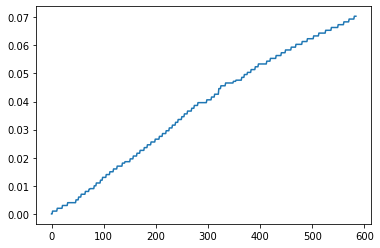

In [23]:
plt.plot(timve_curve_sa, label = 'sa')

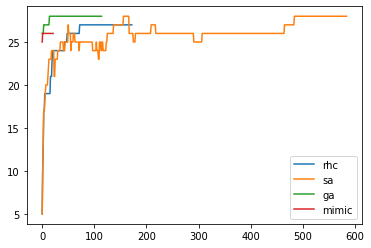

In [159]:
plt.plot(fitness_curve_rhc, label = 'rhc')
plt.plot(fitness_curve_sa, label = 'sa')
plt.plot(fitness_curve_ga, label = 'ga')
plt.plot(fitness_curve_mimic, label='mimic')
plt.legend()

In [162]:
best_fitness_mimic

26.0

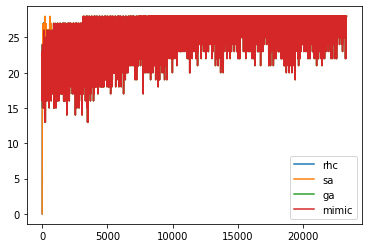

In [161]:
plt.plot(eval_curves_rhc, label = 'rhc')
plt.plot(eval_curves_sa, label = 'sa')
plt.plot(eval_curves_ga, label = 'ga')
plt.plot(eval_curves_ga, label = 'mimic')
plt.legend()

In [104]:
print (len(eval_curves_sa))

698


In [105]:
len(fitness_curve_sa)

585

### Example 3: Travelling Salesperson Using Coordinate-Defined Fitness Function

In [21]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Initialize fitness function object using coords_list
fitness_coords = mlrose_hiive.TravellingSales(coords = coords_list)

In [22]:
# Define optimization problem object
problem_fit = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize = False)

In [23]:
# Solve using genetic algorithm - attempt 1
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit, random_state = 2)

In [24]:
print(best_state)

[1 3 4 5 6 7 0 2]


In [25]:
print(best_fitness)

18.89580466036301


In [26]:
# Solve using genetic algorithm - attempt 2
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit, mutation_prob = 0.2, max_attempts = 100,
                                              random_state = 2)

In [27]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [28]:
print(best_fitness)

17.34261754766733


### Example 4: Travelling Salesperson Using Distance-Defined Fitness Function

In [29]:
# Create list of distances between pairs of cities
dist_list = [(0, 1, 3.1623), (0, 2, 4.1231), (0, 3, 5.8310), (0, 4, 4.2426), (0, 5, 5.3852),
             (0, 6, 4.0000), (0, 7, 2.2361), (1, 2, 1.0000), (1, 3, 2.8284), (1, 4, 2.0000),
             (1, 5, 4.1231), (1, 6, 4.2426), (1, 7, 2.2361), (2, 3, 2.2361), (2, 4, 2.2361),
             (2, 5, 4.4721), (2, 6, 5.0000), (2, 7, 3.1623), (3, 4, 2.0000), (3, 5, 3.6056),
             (3, 6, 5.0990), (3, 7, 4.1231), (4, 5, 2.2361), (4, 6, 3.1623), (4, 7, 2.2361),
             (5, 6, 2.2361), (5, 7, 3.1623), (6, 7, 2.2361)]

# Initialize fitness function object using dist_list
fitness_dists = mlrose_hiive.TravellingSales(distances = dist_list)

In [30]:
# Define optimization problem object
problem_fit2 = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_dists, maximize = False)

In [31]:
# Solve using genetic algorithm
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_fit2, mutation_prob = 0.2, max_attempts = 100,
                                              random_state = 2)

In [32]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [33]:
print(best_fitness)

17.3428


### Example 5: Travelling Salesperson Defining Fitness Function as Part of Optimization Problem Definition Step

In [34]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Define optimization problem object
problem_no_fit = mlrose_hiive.TSPOpt(length = 8, coords = coords_list, maximize = False)

In [35]:
# Solve using genetic algorithm
best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, max_attempts = 100, 
                                              random_state = 2)

In [36]:
print(best_state)

[7 6 5 4 3 2 1 0]


In [37]:
print(best_fitness)

17.34261754766733


### Example 6: Fitting a Neural Network to the Iris Dataset

In [38]:
# Load the Iris dataset
data = load_iris()

In [39]:
# Get feature values of first observation
print(data.data[0])

[5.1 3.5 1.4 0.2]


In [40]:
# Get feature names
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [41]:
# Get target value of first observation
print(data.target[0])

0


In [42]:
# Get target name of first observation
print(data.target_names[data.target[0]])

setosa


In [43]:
# Get minimum feature values
print(np.min(data.data, axis = 0))

[4.3 2.  1.  0.1]


In [44]:
# Get maximum feature values
print(np.max(data.data, axis = 0))

[7.9 4.4 6.9 2.5]


In [45]:
# Get unique target values
print(np.unique(data.target))

[0 1 2]


In [46]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, 
                                                    random_state = 3)

In [47]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

C:\Users\ghaye\AppData\Local\conda\conda\envs\mlrose_test\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [49]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)

In [50]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.45


In [51]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5333333333333333


In [52]:
# Initialize neural network object and fit object - attempt 2
nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model2.fit(X_train_scaled, y_train_hot)

In [53]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.625


In [54]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5666666666666667


### Example 7: Fitting a Logistic Regression to the Iris Data

In [55]:
# Initialize logistic regression object and fit object - attempt 1
lr_model1 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.0001, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100, 
                                      random_state = 3)

lr_model1.fit(X_train_scaled, y_train_hot)

In [56]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [57]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [58]:
# Initialize logistic regression object and fit object - attempt 2

lr_model2 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.01, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100,
                                      random_state = 3)

lr_model2.fit(X_train_scaled, y_train_hot)

In [59]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [60]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7


### Example 8: Fitting a Logistic Regression to the Iris Data using the NeuralNetwork() class

In [61]:
# Initialize neural network object and fit object - attempt 1
lr_nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.0001, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model1.fit(X_train_scaled, y_train_hot)

In [62]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [63]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [64]:
# Initialize neural network object and fit object - attempt 2
lr_nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.01, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model2.fit(X_train_scaled, y_train_hot)

In [65]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [66]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7
